In [1]:
import pandas as pd 
import os
import numpy as np

os.chdir(r'C:\Users\nicho\OneDrive\Desktop\Bitcoin Regresssion Project')
BTC = pd.read_csv(r'BTC-USD.csv' , parse_dates = ['Date'], index_col=['Date'])
SNP = pd.read_csv(r'Standard&PoorsHistorical.csv', parse_dates = ['Date'], index_col=['Date'])
Margin = pd.read_csv(r'margin-statistics.csv')
CPI = pd.read_csv(r'CPIHistoricalData.csv', parse_dates = ['Date'], index_col= ['Date'])
Margin.head()

,Year-Month,Debit Balances in Customers' Securities Margin Accounts,Free Credit Balances in Customers' Cash Accounts,Free Credit Balances in Customers' Securities Margin Accounts
0,2021-11,"918,598","235,638","211,623"
1,2021-10,"935,862","226,159","200,548"
2,2021-09,"903,117","229,279","205,564"
3,2021-08,"911,545","219,365","198,913"
4,2021-07,"844,324","215,463","195,762"


In [8]:
#Dropping irrelevant features

Drop = ['Symbol', 'Open', 'High', 'Low', 'Volume BTC']
BTCDrop = BTC.drop(Drop, axis = 1)

Drop1 = ['Volume', 'Open', 'High', 'Low']
SNPDrop = SNP.drop(Drop1, axis = 1)


Drop3 = ['Open', 'High', 'Low', 'Volume']
CPIDrop = CPI.drop(Drop3, axis = 1)

Drop4 = ['Free Credit Balances in Customers\' Cash Accounts', 'Free Credit Balances in Customers\' Securities Margin Accounts']
MarginDrop = Margin.drop(Drop4, axis =1)

In [9]:
#Renaming Columns
BTCDrop.rename(columns = {'Close': 'BTC', 
                          'Volume USD': 'Liquidity'}, inplace = True)

SNPDrop.rename(columns = {'Close/Last': 'SNP close'}, inplace = True)

CPIDrop.rename(columns = {'Close/Last': 'CPI close'}, inplace = True)

  #Reversing order of DF
MarginDrop.rename(columns = {'Year-Month' : 'Date'}, inplace = True)



In [10]:
#Converting feature samples to monthly 
BTCMonthly = BTCDrop.resample('M').median()
CPIMonthly = CPIDrop.resample('M').median()
SNPMonthly = SNPDrop.resample('M').median()

#Setting index back to default
BTCMonthly.reset_index(inplace = True)
SNPMonthly.reset_index(inplace = True)
CPIMonthly.reset_index(inplace = True)

#Changing layout to use as key for merge
BTCMonthly['Date'] = BTCMonthly['Date'].dt.strftime('%Y-%m')
SNPMonthly['Date'] = SNPMonthly['Date'].dt.strftime('%Y-%m')
CPIMonthly['Date'] = CPIMonthly['Date'].dt.strftime('%Y-%m')

# Creating 2 Dataframes for testing to understand if larger data makes a difference in the predictability power

In [12]:
#Dataframe with Margin feature

MarginMerged = pd.merge(pd.merge(pd.merge(MarginDrop, BTCMonthly, on = 'Date'), SNPMonthly, on = 'Date'), CPIMonthly, on = 'Date')
MarginMerged.set_index('Date')

,Debit Balances in Customers' Securities Margin Accounts,BTC,Liquidity,SNP close,CPI close
Date,,,,,
2020-04,"524,696",7036.005,1.737234e+07,2797.800,-0.40
2020-03,"479,291",6428.540,1.961258e+07,2605.620,0.10
2020-02,"545,127",9703.440,1.251471e+07,3337.750,0.10
2020-01,"561,812",8425.180,8.405485e+06,3276.240,0.20
2019-12,"579,221",7241.660,5.251600e+06,3191.140,0.30
2019-11,"563,482",8489.905,7.125089e+06,3100.085,0.40
2019-10,"554,604",8227.000,8.170035e+06,2989.690,0.10
2019-09,"555,910",10180.430,1.150783e+07,2982.130,0.10
2019-08,"564,894",10408.140,1.457437e+07,2894.595,0.30


In [89]:
#Cleaning comma from feature
NewDebitCol = MarginMerged['Debit Balances in Customers\' Securities Margin Accounts']
NewDebit = [col.replace(',', '') for col in NewDebitCol]
MarginMerged['Debit Balances in Customers\' Securities Margin Accounts'] = NewDebit


In [15]:
#Dataframe without Margin feature
Merged = pd.concat([BTCDrop, SNPDrop, CPIDrop], axis=1, join='inner')
Merged

,BTC,Liquidity,SNP close,CPI close
Date,,,,
2020-04-09,7315.25,16310014.53,2789.82,0.1
2020-04-08,7369.60,18138080.27,2749.98,0.1
2020-04-07,7201.81,17047120.32,2659.41,0.1
2020-04-06,7336.96,26533750.17,2663.68,0.1
2020-04-03,6740.88,19692803.68,2488.65,0.1
...,...,...,...,...
2015-10-14,253.00,30115.77,1994.24,-0.1
2015-10-13,250.00,12875.40,2003.69,-0.1
2015-10-12,247.60,9493.89,2017.46,-0.1


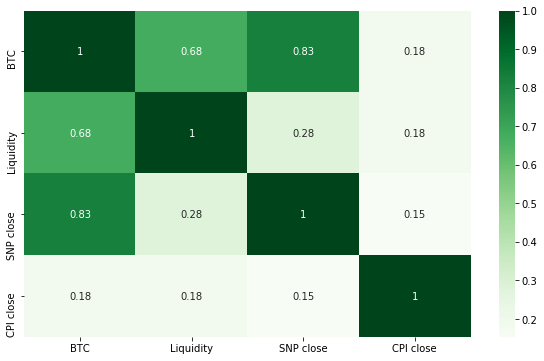

In [16]:
#Correlation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlations = MarginMerged.corr() 
plt.figure(figsize=(10,6))
sns.heatmap(correlations, cmap = 'Greens', annot = True)

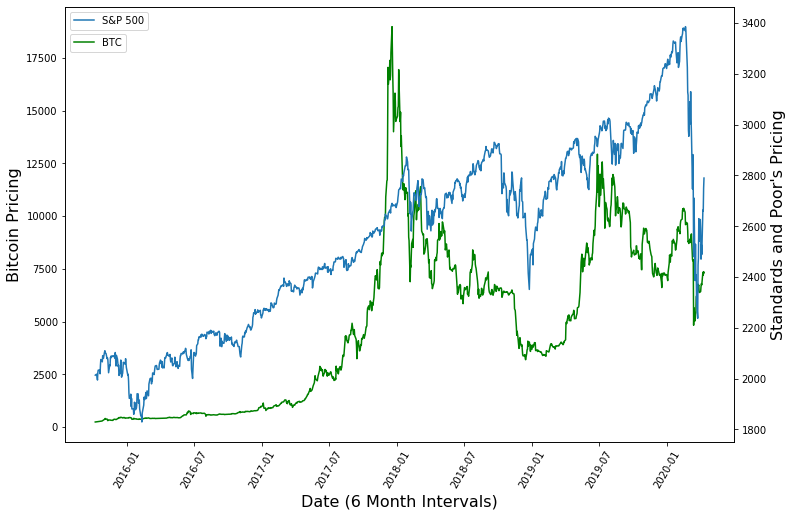

In [17]:
# Bitcoin & SNP Visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,8))
x1 = plt.plot(Merged['BTC'],color = 'Green', label = 'BTC')
ax.set_xlabel('Date (6 Month Intervals)', fontsize = 16)
ax. set_ylabel('Bitcoin Pricing', fontsize = 16)
plt.xticks(rotation=60)
ax.legend(loc = 'upper left', bbox_to_anchor=(.0001, .95))

ax2 = ax.twinx()
ax2.plot(Merged['SNP close'],  label = 'S&P 500')
ax2.set_ylabel("Standards and Poor's Pricing", fontsize = 16)
ax2.legend()

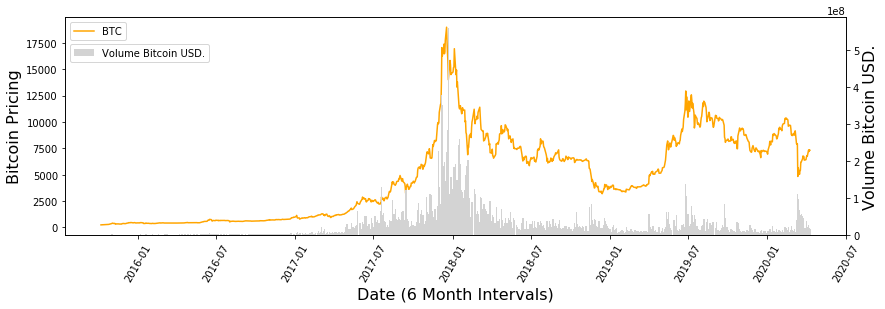

In [18]:
#Bitcoin and Liquidity Visualization

fig, ax = plt.subplots(figsize = (14,4))
x1 = plt.plot(Merged['BTC'],color = 'orange', label = 'BTC')
ax.set_xlabel('Date (6 Month Intervals)', fontsize = 16)
ax. set_ylabel('Bitcoin Pricing', fontsize = 16)
plt.xticks(rotation=60)
ax.legend(loc = 'upper left')

ax2 = ax.twinx()
ax2.bar(Merged.index, Merged['Liquidity'],  label = 'Volume Bitcoin USD.', width = 3, color = 'lightgrey')
ax2.set_ylabel("Volume Bitcoin USD.", fontsize = 16)
ax2.legend(bbox_to_anchor=(.191, .9))

In [ ]:
#Bitcoin and Margin Accounts Visualiation

In [163]:
#Model Creation
import random
from sklearn.preprocessing import StandardScaler

inputs = MarginMerged.drop(['BTC', 'Date'], 1)
inputs['beta'] = np.ones((len(inputs), 1))
output = MarginMerged['BTC']


samplesize = len(output)
features = inputs.shape[1]
theta = np.ones(features)


#Standardizing x-values for easier gradient convergence 
sc=StandardScaler()
inputs = sc.fit_transform(inputs)

In [ ]:
#Hypothesis Function 
hypothesis = inputs@theta
print(hypothesis)

In [ ]:
#Cost Function